In [13]:
# lib import
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from pmdarima.arima import auto_arima
#convert registers for matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [14]:
# Loading  dataset, changing data string -> data and creating temporal series
base = pd.read_csv('AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)
ts = base['#Passengers']

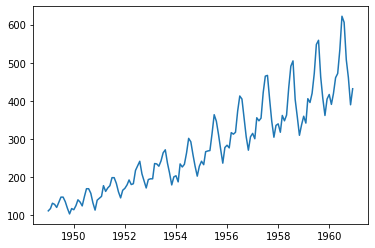

In [15]:
# temporal series visualization
plt.plot(ts)

In [16]:
# cretion of the arima model p = 2, q = 1, d = 2, traning and seeing results
model = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
trained_model = model.fit()
trained_model.summary()

/home/guims357/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/guims357/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 04 Jan 2022   AIC                           1353.347
Time:                        16:06:20   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.000      -2.087      -1.600
ma.L2          0.9953      0.135      7.398      0.000       0.732       1.259
sigma2       665.9646    113.887      5.848      0.000     442.751     889.178
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.59   Prob(JB):                         0.40
Heteroskedasticity (H):               7.38   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# 12 data prevision
prevision = trained_model.forecast(steps = 12)[0]
prevision

439.8545131561977

In [ ]:
# create an axis to the full temporal series with the model previsions
#lot_insample = original data
axis = ts.plot()
trained_model.plot_predict('1960-01-01', '1970-01-01',
                             ax = axis, plot_insample = True)

In [19]:
# auto arima implementation to automatically find p,q and d
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)
modelo_auto.summary()
# Warning below are normal

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Tue, 04 Jan 2022   AIC                           1017.847
Time:                                     16:07:07   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.601      0.000      -1.057      -0.907
sigma2       129.3132     14.556      8.884      0.000     100.783     157.843
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
next_12 = modelo_auto.predict(n_periods = 12)
# next 12 values
next_12 

array([445.63493355, 420.39502446, 449.19834797, 491.83997601,
       503.39450237, 566.86247078, 654.2601892 , 638.5974932 ,
       540.88373892, 494.12660991, 423.33269015, 465.50754991])